## Classificação

Vejamos um exemplo de classificação para comparar as metologias do sklearn e do Sktime.

In [76]:
# import libraries
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# get data
diabetes = load_diabetes()

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target)

# get model
model = RandomForestRegressor()

# fit model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate predictions
mean_squared_error(y_pred, y_test)

2951.2434612612615

## Classificação usando pipelines

Um outro exemplo agora utilizando pipelines.

In [75]:
# import libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# get data
diabetes = load_diabetes()

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target)

# make pipeline
pipeline = make_pipeline(
    StandardScaler(), # normalize
    KNeighborsRegressor() # get model
)

# fit pipeline
pipeline.fit(X_train, y_train)

# get predictions
y_pred = pipeline.predict(X_test)

# evaluate predictions
mean_squared_error(y_pred, y_test)

3128.622702702703

## Previsão com Sktime

### Naive forecaster

In [126]:
# import libraries
from sktime.datasets import load_lynx
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

# get data
y = load_lynx()

# split data into train and test
y_train, y_test = temporal_train_test_split(y, test_size=12)

# get forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Anoter way to define fh:
# fh = ForecastingHorizon(pd.period_range('1932'), periods=12, freq="Y"), is_relative=False)

# get model
forecaster = NaiveForecaster(strategy='drift', window_length=10)

# fit model
forecaster.fit(y_train)

# get predictions
y_pred = forecaster.predict(fh)

# evaluate predictions
mean_absolute_percentage_error(y_test, y_pred, symetric=False)

2.797443488405975

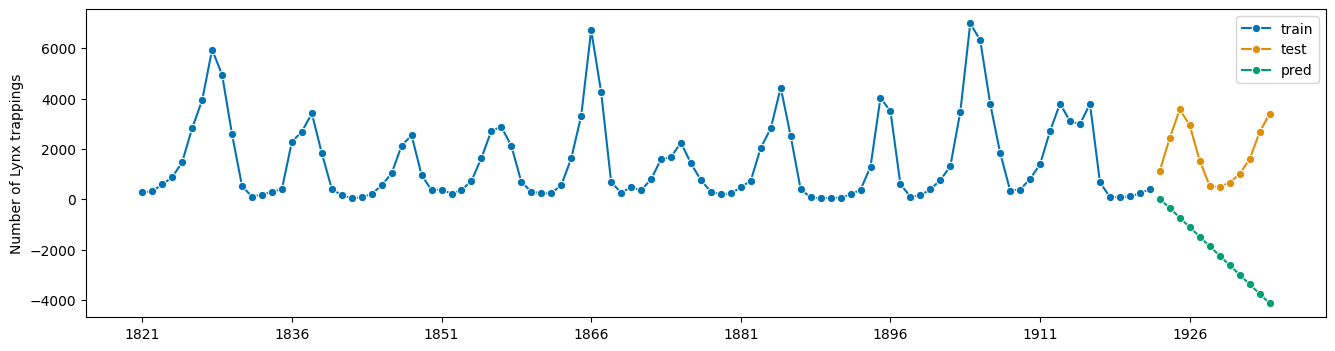

In [127]:
plot_series(y_train, y_test, y_pred, labels=['train', 'test', 'pred'])
plt.show()

### AutoArima

In [128]:
# import libraries
from sktime.datasets import load_lynx
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

# get data
y = load_lynx()

# split data into train and test
y_train, y_test = temporal_train_test_split(y, test_size=12)

# get forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Anoter way to define fh:
# fh = ForecastingHorizon(pd.period_range('1932'), periods=12, freq="Y"), is_relative=False)

# get model
forecaster = AutoARIMA(suppress_warnings=True)

# fit model
forecaster.fit(y_train)

# get predictions
y_pred = forecaster.predict(fh)

# evaluate predictions
mean_absolute_percentage_error(y_test, y_pred, symetric=False)

0.31590622561588994

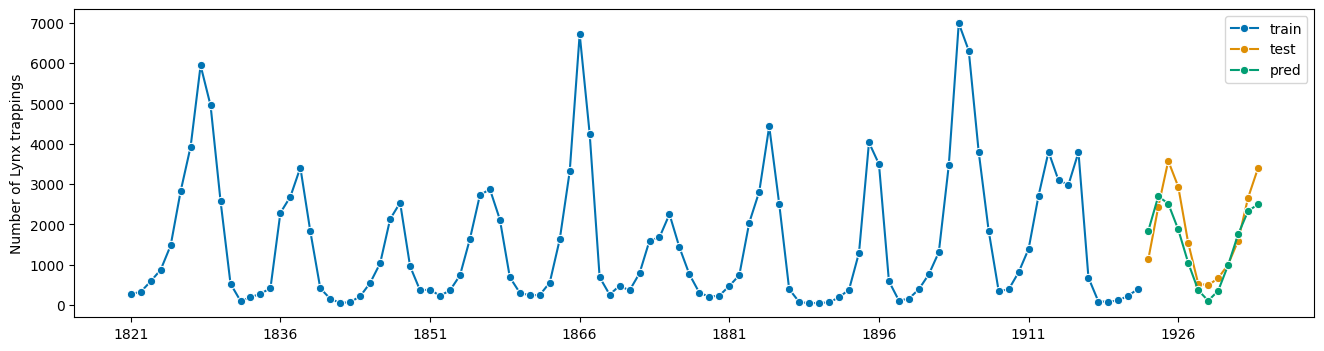

In [129]:
plot_series(y_train, y_test, y_pred, labels=['train','test','pred'])
plt.show()

### List all sktime estimators

In [130]:
from sktime.registry import all_estimators
all_estimators('forecaster', as_dataframe=True)

,name,estimator
0,ARDL,<class 'sktime.forecasting.ardl.ARDL'>
1,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
2,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>
3,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
4,AutoEnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.A...
5,BATS,<class 'sktime.forecasting.bats.BATS'>
6,BaggingForecaster,<class 'sktime.forecasting.compose._bagging.Ba...
7,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
8,ConformalIntervals,<class 'sktime.forecasting.conformal.Conformal...
9,Croston,<class 'sktime.forecasting.croston.Croston'>


## Previsão com Sktime + Sklearn

### K-Neighbors Regressor

In [135]:
# import libraries
from sktime.datasets import load_lynx
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sklearn.neighbors import KNeighborsRegressor
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

# get data
y = load_lynx()

# split data into train and test
y_train, y_test = temporal_train_test_split(y, test_size=12)

# get forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Anoter way to define fh:
# fh = ForecastingHorizon(pd.period_range('1932'), periods=12, freq="Y"), is_relative=False)

# get model
regressor = KNeighborsRegressor(n_neighbors=3)

# convert data to tabular and ajust model
forecaster = make_reduction(regressor, window_length=10, strategy="recursive")

# fit model
forecaster.fit(y_train)

# get predictions
y_pred = forecaster.predict(fh)

# evaluate predictions
mean_absolute_percentage_error(y_test, y_pred, symetric=False)

0.36231040147642374

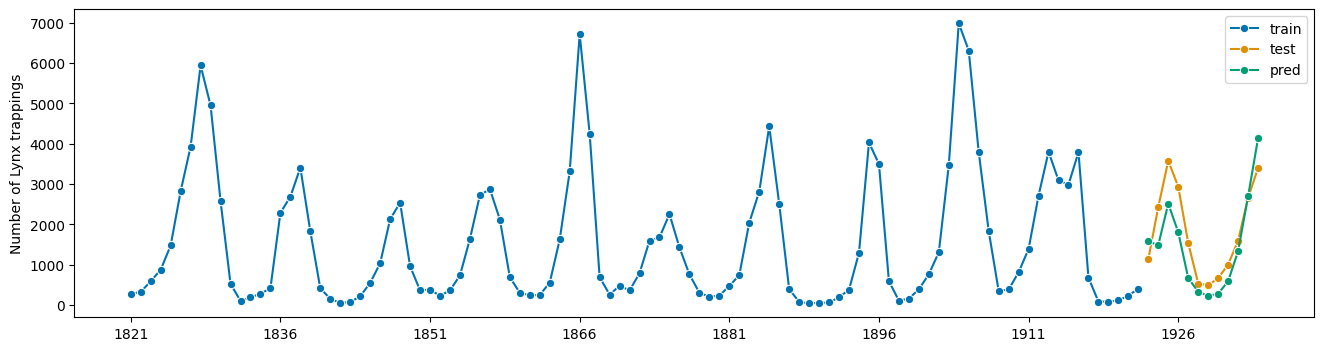

In [136]:
plot_series(y_train, y_test, y_pred, labels=['train', 'test', 'pred'])
plt.show()

### Gradient Boosting Regressor

In [137]:
# import libraries
from sktime.datasets import load_lynx
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sklearn.ensemble import GradientBoostingRegressor
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

# get data
y = load_lynx()

# split data into train and test
y_train, y_test = temporal_train_test_split(y, test_size=12)

# get forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Anoter way to define fh:
# fh = ForecastingHorizon(pd.period_range('1932'), periods=12, freq="Y"), is_relative=False)

# get model
regressor = GradientBoostingRegressor()

# convert data to tabular and ajust model
forecaster = make_reduction(regressor, window_length=10, strategy="recursive")

# fit model
forecaster.fit(y_train)

# get predictions
y_pred = forecaster.predict(fh)

# evaluate predictions
mean_absolute_percentage_error(y_test, y_pred, symetric=False)

0.34562090633275117

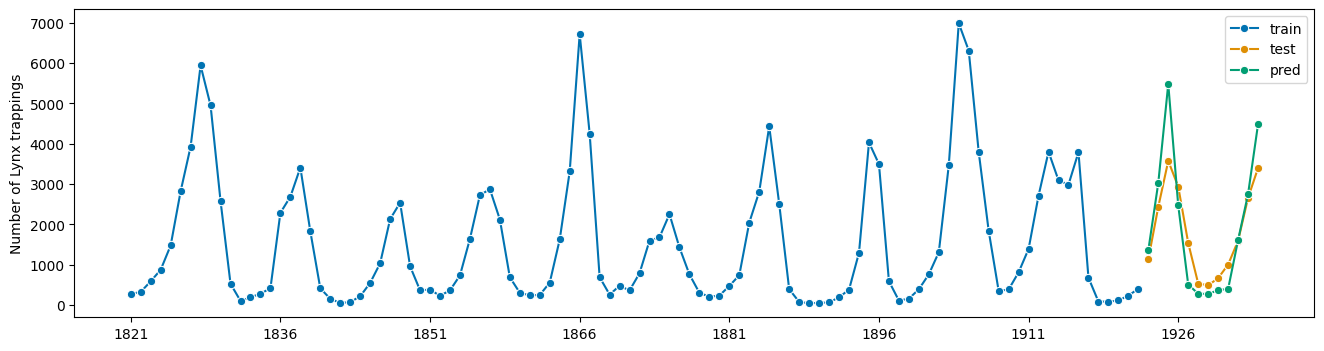

In [138]:
plot_series(y_train, y_test, y_pred, labels=['train', 'test', 'pred'])
plt.show()

## Sktime + LightGBM

In [142]:
# import libraries
from sktime.datasets import load_lynx
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from lightgbm import LGBMRegressor
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

# get data
y = load_lynx()

# split data into train and test
y_train, y_test = temporal_train_test_split(y, test_size=12)

# get forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Anoter way to define fh:
# fh = ForecastingHorizon(pd.period_range('1932'), periods=12, freq="Y"), is_relative=False)

# get model
regressor = LGBMRegressor(first_metric_only = True)

# convert data to tabular and ajust model
forecaster = make_reduction(regressor, window_length=10, strategy="recursive")

# fit model
forecaster.fit(y_train)

# get predictions
y_pred = forecaster.predict(fh)

# evaluate predictions
mean_absolute_percentage_error(y_test, y_pred, symetric=False)

0.4362689602520476

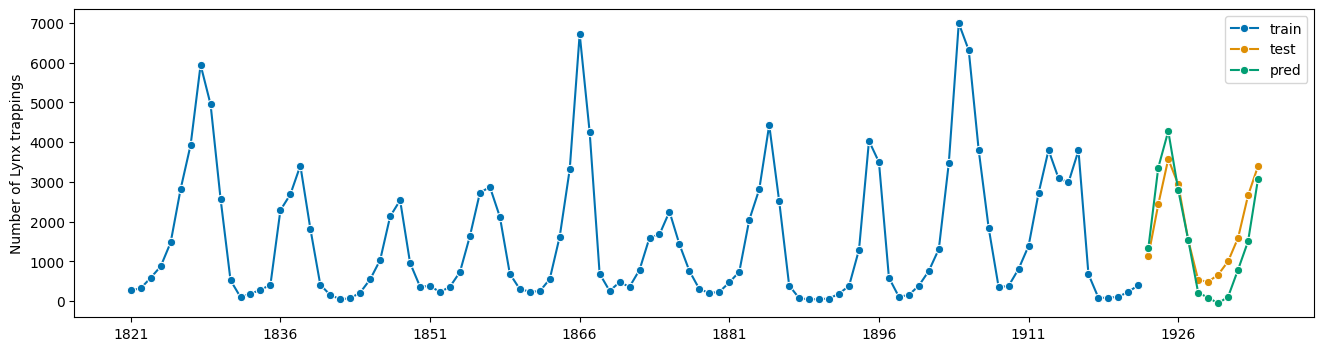

In [140]:
plot_series(y_train, y_test, y_pred, labels=['train', 'test', 'pred'])
plt.show()

## Sktime para atualização de modelos

In [155]:
from sktime.forecasting.ets import AutoETS
from sktime.datasets import load_lynx


# get data
y = load_lynx()

# split data into train and test
y_train = y.loc[:'1922']

# get observed
y_observed = y_train.copy()

# get forecast horizon
fh = np.arange(1,13)

# get model
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)

# fit model
forecaster.fit(y_train)

# make predictions
y_pred = forecast.predict(fh)

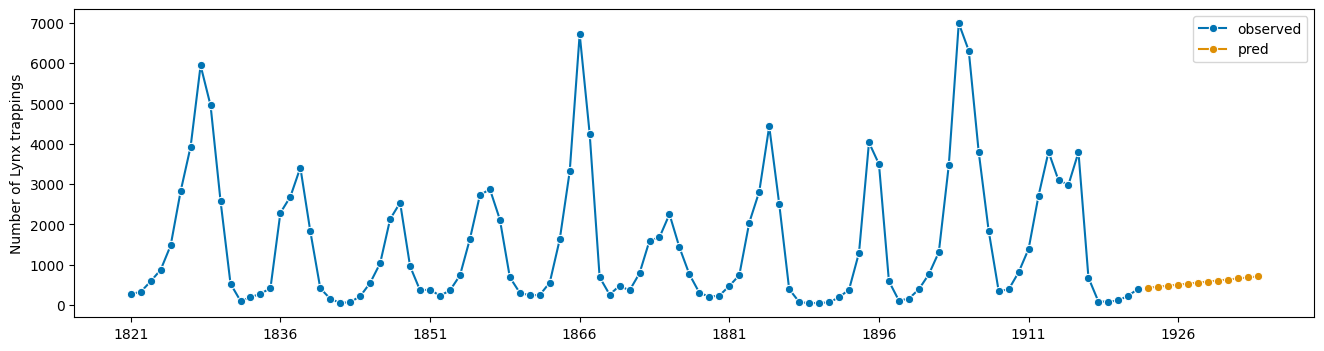

In [156]:
plot_series(y_observed, y_pred, labels=['observed', 'pred'])
plt.show()

In [157]:
# get new data
y_observed = y.loc[:'1923']
new_data = y.loc[['1923']]

# update model
forecaster.update(new_data)

# predict again
y_pred = forecaster.predict(fh)

C:\Users\leandro\Desktop\timeseries\learning-time-series\env\Lib\site-packages\sktime\forecasting\base\_base.py:1887: UserWarning: NotImplementedWarning: AutoETS does not have a custom `update` method implemented. AutoETS will be refit each time `update` is called with update_params=True. To refit less often, use the wrappers in the forecasting.stream module, e.g., UpdateEvery.
  warn(


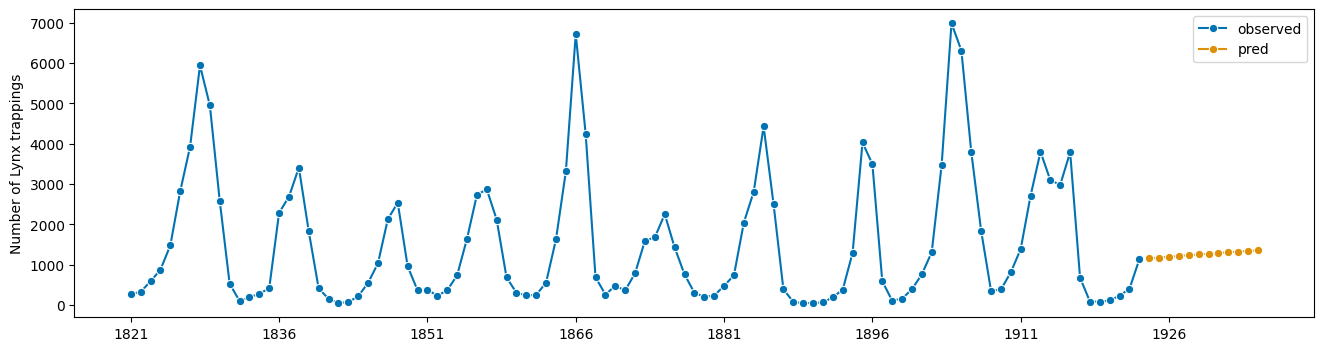

In [158]:
plot_series(y_observed, y_pred, labels=['observed', 'pred'])
plt.show()

## Sktime para atualização de modelos automatizado

In [159]:
## TODO

## Sktime Tunando

In [175]:
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter
)
from sktime.utils.plotting import plot_windows

param_grid = {'window_length': [9,10,11,12,13,14,15], 'estimator__n_neighbors': np.arange(1,10)}

regressor = KNeighborsRegressor()
forecaster = make_reduction(regressor, strategy="recursive")
cv = SlidingWindowSplitter(window_length=60, fh=fh)

gscv = ForecastingGridSearchCV(
    forecaster, cv=cv, param_grid=param_grid
)

gscv.fit(y_train)
y_pred = gscv.predict(fh)
mean_absolute_percentage_error(y_test, y_pred, symetric=False)

0.48882242998197717

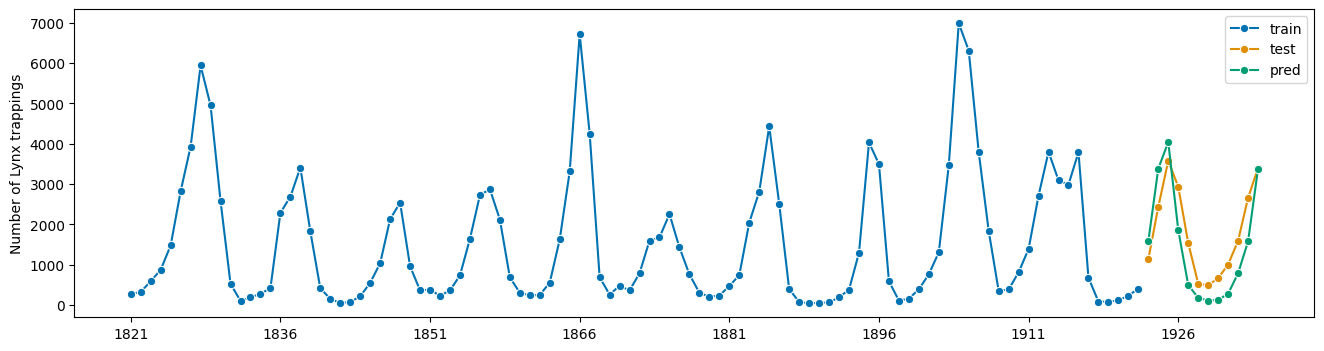

In [176]:
plot_series(y_train, y_test, y_pred, labels=['train', 'test', 'pred'])
plt.show()

In [177]:
gscv.best_params_

{'estimator__n_neighbors': 3, 'window_length': 11}

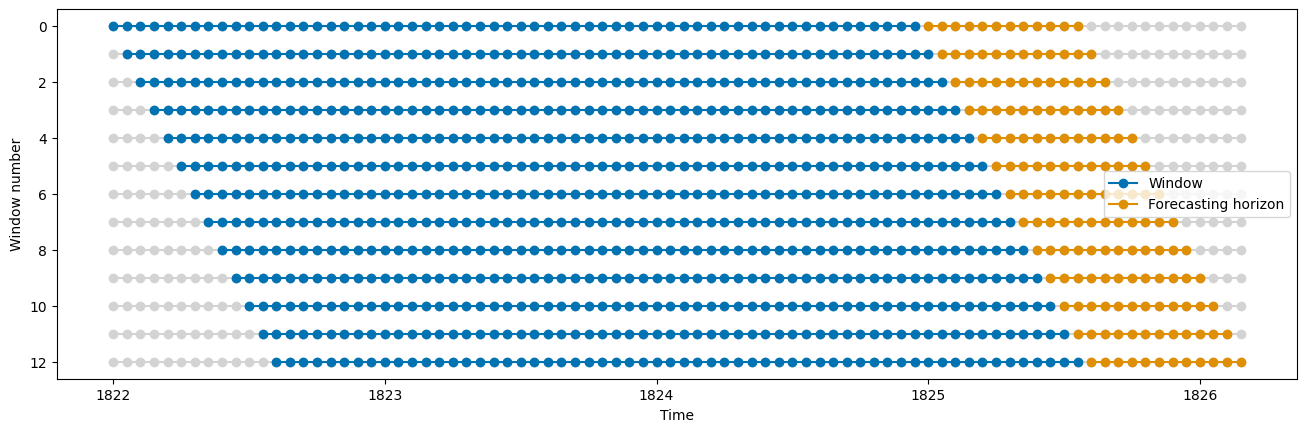

In [181]:
plot_windows(cv, y.iloc[:84])

## Sktime Tuning AutoML

In [186]:
from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

forecaster = MultiplexForecaster(
    forecasters=[
        ('naive', NaiveForecaster(strategy='last')),
        ('ets', ExponentialSmoothing(trend='add', sp=12))
    ]
)

forecaster_params_grid = {
    "selected_forecaster": ['ets', 'naive']
}

gscv = ForecastingGridSearchCV(
    forecaster, cv=cv, param_grid=forecaster_params_grid
)
gscv.fit(y_train)
gscv.best_params_

{'selected_forecaster': 'naive'}

## Sktime pipelines

In [195]:
from sktime.forecasting.compose import TransformedTargetForecaster 
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender

In [218]:
regressor = KNeighborsRegressor()
forecaster = make_reduction(regressor, strategy='recursive')

forecaster = TransformedTargetForecaster([
    ('desazonalize', Deseasonalizer()),
    ('detrend', Detrender()),
    ('forecast', forecaster)
])

forecaster.fit(y_train)
y_pred = forecast.predict(np.arange(1,len(y_test)))

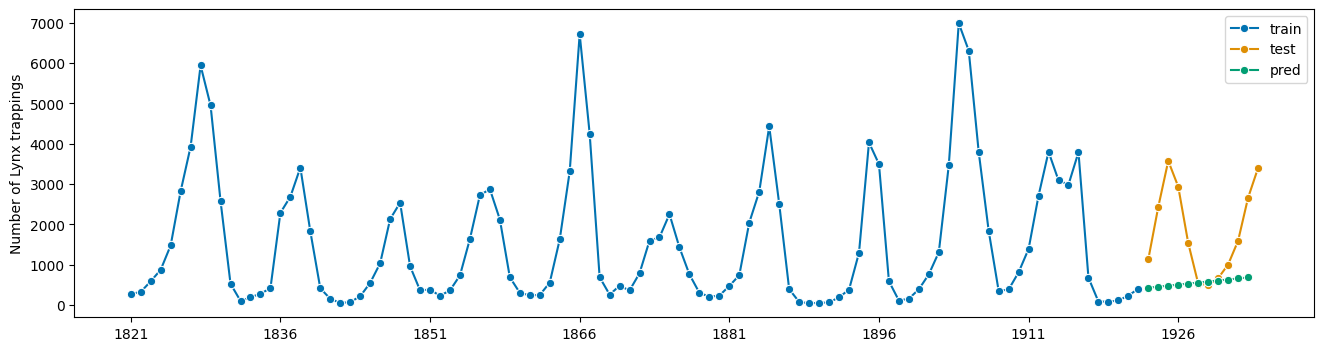

In [219]:
plot_series(y_train, y_test, y_pred, labels=['train', 'test', 'pred'])
plt.show()

## Sktime com variáveis exôneas

In [220]:
from sktime.datasets import load_longley

In [ ]:
# tempo 51

## Referências

- https://www.youtube.com/watch?v=GbRfbXHXUKM